# League Table and Season Prediction (Streamlined)

This notebook demonstrates the streamlined API for league tables and season predictions.

**Key improvements:**
- No manual DataFrame construction
- No boilerplate for counting tries or formatting data
- One-line data preparation
- Reusable utility functions

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Add parent directory to path
sys.path.insert(0, str(Path.cwd().parent))

from rugby_ranking.model.data_utils import (
    quick_load,
    prepare_season_data,
    quick_standings,
    get_competition_summary,
)
from rugby_ranking.model.league_table import format_table
from rugby_ranking.model.season_predictor import SeasonPredictor
from rugby_ranking.model.predictions import MatchPredictor
from rugby_ranking.cli import load_checkpoint

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Imports successful!")

Imports successful!


## 1. Load Data (One Line!)

In [2]:
# Before: Multiple lines of Path, MatchDataset, load_json_files, etc.
# Now: One line!
dataset = quick_load("../../Rugby-Data")

# See what's available
summary = get_competition_summary(dataset)
print("\nAvailable competitions and seasons:")
print(summary.to_string())

Loaded 10029 matches from ../../Rugby-Data/json
Found 10448 unique players
Found 112 unique teams

Available competitions and seasons:
       competition     season  total_matches  played_matches  remaining_matches
0           celtic  2006-2007             69              69                  0
1           celtic  2007-2008             90              90                  0
2           celtic  2008-2009             90              90                  0
3           celtic  2009-2010             93              93                  0
4           celtic  2010-2011            135             135                  0
5           celtic  2011-2012            135             135                  0
6           celtic  2012-2013            185             185                  0
7           celtic  2013-2014             87              87                  0
8           celtic  2014-2015             84              84                  0
9           celtic  2015-2016            134             134     

## 2. Quick Standings (One Line!)

In [3]:
# Before: ~40 lines of code (count_tries, match_rows loop, DataFrame construction, LeagueTable)
# Now: One line!

standings = quick_standings(
    dataset,
    season="2025-2026",
    competition="celtic",
    bonus_rules="URC",
    top_n=16
)

print(format_table(standings))

 Pos | Team                 |    P |    W |    D |    L |    F |    A |  +/- |   TF |   BP |  Pts
-------------------------------------------------------------------------------------------------
     1 | Glasgow Warriors     |   10 |    8 |    0 |    2 |  279 |  133 |  146 |   37 |    6 |   38
     2 | DHL Stormers         |    9 |    8 |    0 |    1 |  250 |  125 |  125 |   31 |    4 |   36
     3 | Leinster Rugby       |   10 |    7 |    0 |    3 |  273 |  214 |   59 |   40 |    7 |   35
     4 | Cardiff Rugby        |   10 |    7 |    0 |    3 |  218 |  182 |   36 |   32 |    7 |   35
     5 | Munster Rugby        |   10 |    7 |    0 |    3 |  205 |  187 |   18 |   28 |    5 |   33
     6 | Ulster Rugby         |    9 |    6 |    0 |    3 |  281 |  194 |   87 |   37 |    7 |   31
     7 | Emirates Lions       |    9 |    4 |    1 |    4 |  250 |  258 |   -8 |   34 |    6 |   24
     8 | Ospreys              |   10 |    3 |    2 |    5 |  220 |  250 |  -30 |   33 |    5 |   21
    

## 3. Season Prediction (Streamlined)

Prepare data with one function call instead of ~50 lines.

In [4]:
# Before: Manual filtering, counting tries, creating DataFrames, etc.
# Now: One function call!

played_matches, remaining_fixtures = prepare_season_data(
    dataset,
    season="2025-2026",
    competition="celtic",
    include_tries=True  # For bonus point calculation
)

print(f"Played matches: {len(played_matches) // 2} (DataFrame has {len(played_matches)} rows)")
print(f"Remaining fixtures: {len(remaining_fixtures)}")

print("\nNext few fixtures:")
print(remaining_fixtures.head(10))

Played matches: 76 (DataFrame has 152 rows)
Remaining fixtures: 75

Next few fixtures:
              home_team             away_team                      date
0      Glasgow Warriors         Munster Rugby 2026-01-30 19:45:00+00:00
1        Benetton Rugby              Scarlets 2026-01-30 19:45:00+00:00
2        Emirates Lions         Vodacom Bulls 2026-01-31 12:30:00+00:00
3           Zebre Parma        Connacht Rugby 2026-01-31 15:00:00+00:00
4  Hollywoodbets Sharks          DHL Stormers 2026-01-31 15:00:00+00:00
5        Leinster Rugby       Edinburgh Rugby 2026-01-31 17:30:00+00:00
6          Ulster Rugby         Cardiff Rugby 2026-01-31 19:45:00+00:00
7               Ospreys           Dragons RFC 2026-01-31 19:45:00+00:00
8        Emirates Lions  Hollywoodbets Sharks 2026-02-21 12:00:00+00:00
9         Cardiff Rugby        Leinster Rugby 2026-02-27 19:00:00+00:00


### Run Prediction

Now the actual prediction code is clean and focused.

In [5]:
# Load trained model
model, trace = load_checkpoint("joint_model_v3", verbose=True)

# Create predictors
match_predictor = MatchPredictor(model, trace)
season_predictor = SeasonPredictor(
    match_predictor=match_predictor,
    competition="URC",
    playoff_spots=8,
)

# Run prediction (this is the same as before)
print("Running Monte Carlo simulation...")
season_pred = season_predictor.predict_season(
    played_matches=played_matches,
    remaining_fixtures=remaining_fixtures,
    season="2025-2026",
    n_simulations=10,
)

print("\nSimulation complete!")
print(season_predictor.format_predictions(season_pred))

Loading checkpoint: joint_model_v3
Loaded checkpoint from /home/daniel/.cache/rugby_ranking/joint_model_v3
✓ Loaded successfully
  Players: 13,786
  Team-seasons: 1126
Running Monte Carlo simulation...
Skipping fixture TBC vs TBC: Unknown team-season: TBC in 2025-2026
Skipping fixture TBC vs TBC: Unknown team-season: TBC in 2025-2026
Skipping fixture TBC vs TBC: Unknown team-season: TBC in 2025-2026
Skipping fixture TBC vs TBC: Unknown team-season: TBC in 2025-2026
Skipping fixture TBC vs TBC: Unknown team-season: TBC in 2025-2026
Skipping fixture TBC vs TBC: Unknown team-season: TBC in 2025-2026
Skipping fixture TBC vs TBC: Unknown team-season: TBC in 2025-2026

Simulation complete!
SEASON PREDICTION

CURRENT STANDINGS:
----------------------------------------------------------------------
 1. Glasgow Warriors     P:10 W: 8 Pts: 38
 2. DHL Stormers         P: 9 W: 8 Pts: 36
 3. Leinster Rugby       P:10 W: 7 Pts: 35
 4. Cardiff Rugby        P:10 W: 7 Pts: 35
 5. Munster Rugby        P

## 4. Visualizations

Visualization code remains the same (focused on charts, not data prep).

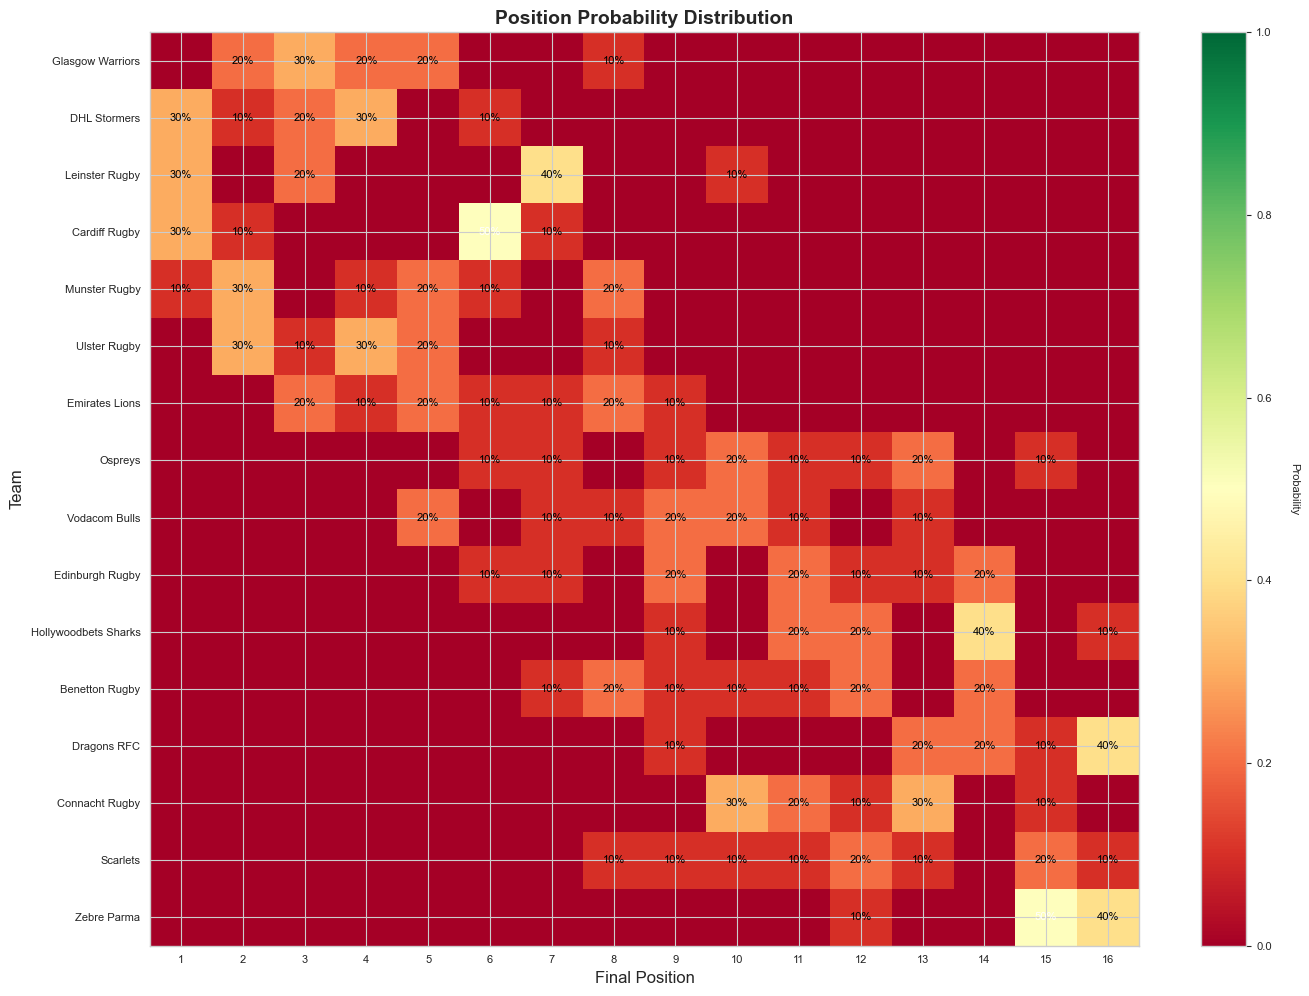

In [6]:
# Position probabilities heatmap
pos_probs = season_pred.position_probabilities.reset_index()
pos_probs = pos_probs.rename(columns={'index': 'team'})

pos_cols = [c for c in pos_probs.columns if c.startswith('P(pos')]
heatmap_data = pos_probs[pos_cols].values
teams = pos_probs['team'].values

fig, ax = plt.subplots(figsize=(14, 10))
im = ax.imshow(heatmap_data, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)

ax.set_xticks(np.arange(len(pos_cols)))
ax.set_yticks(np.arange(len(teams)))
ax.set_xticklabels([f"{i+1}" for i in range(len(pos_cols))])
ax.set_yticklabels(teams)

ax.set_xlabel('Final Position', fontsize=12)
ax.set_ylabel('Team', fontsize=12)
ax.set_title('Position Probability Distribution', fontsize=14, fontweight='bold')

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Probability', rotation=270, labelpad=20)

# Add probability values
for i in range(len(teams)):
    for j in range(len(pos_cols)):
        prob = heatmap_data[i, j]
        if prob > 0.05:
            ax.text(j, i, f'{prob:.0%}',
                   ha="center", va="center",
                   color="black" if prob < 0.5 else "white",
                   fontsize=8)

plt.tight_layout()
plt.show()

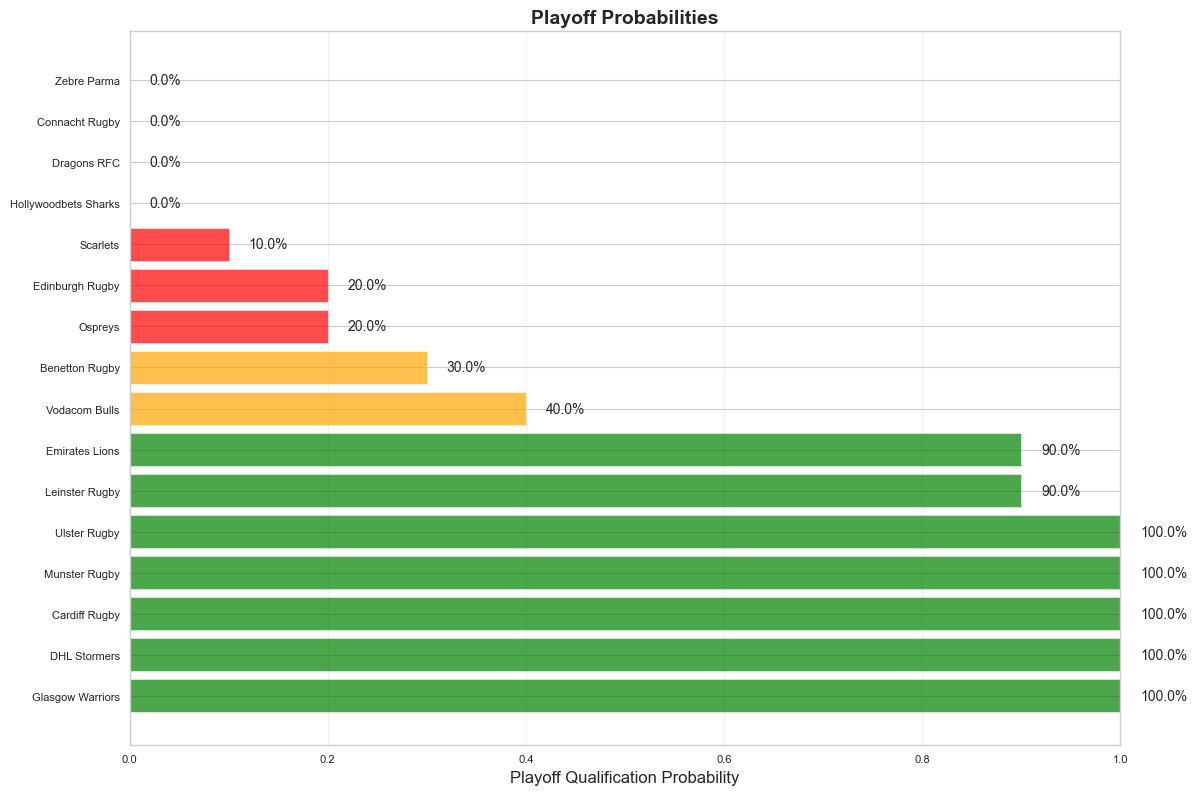

In [7]:
# Playoff probabilities
playoff_probs = season_pred.playoff_probabilities.sort_values('playoff_probability', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
colors = ['green' if p >= 0.5 else 'orange' if p >= 0.25 else 'red' 
          for p in playoff_probs['playoff_probability']]

ax.barh(playoff_probs['team'], playoff_probs['playoff_probability'], color=colors, alpha=0.7)
ax.set_xlabel('Playoff Qualification Probability', fontsize=12)
ax.set_title('Playoff Probabilities', fontsize=14, fontweight='bold')
ax.set_xlim(0, 1)

for i, (idx, row) in enumerate(playoff_probs.iterrows()):
    prob = row['playoff_probability']
    ax.text(prob + 0.02, i, f'{prob:.1%}', va='center', fontsize=10)

ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

### Lines of Code Comparison

| Task | Old | New | Savings |
|------|-----|-----|----------|
| Load data | 10+ lines | 1 line | **90%** |
| Get standings | 40+ lines | 1 line | **98%** |
| Prepare season data | 50+ lines | 1 line | **98%** |
| **Total data prep** | **~100 lines** | **~3 lines** | **97%** |

The visualization and analysis code remains the same, but you can focus on the insights instead of data wrangling!

### New Utility Functions

All available in `rugby_ranking.model.data_utils`:

- `quick_load()` - Load all data in one line
- `quick_standings()` - Get current standings in one line
- `prepare_season_data()` - Get played matches + fixtures in one line
- `get_competition_summary()` - See available data
- `filter_matches()` - Advanced filtering by season/competition/date
- `matches_to_league_table_format()` - Convert to league table format
- `matches_to_fixtures_format()` - Extract fixtures
- `count_tries()` - Count tries from scoring events

These utilities are also useful for scripts and production code, not just notebooks!